CNN Architectures:
- VGG16 ( https://arxiv.org/pdf/1409.1556.pdf )
- ResNet34
    - Skip connections
    - Global Average Pooling
- Making activations gaussian: Batch Normalization

In [1]:
import torch
from torch import nn

In [2]:
def O(I,K,P,S):
    return ((I-K+2*P)/(S))+1

In [3]:
####Input 224,224,3
#### Source : https://github.com/rasbt/deeplearning-models/blob/master/pytorch_ipynb/cnn/cnn-vgg16.ipynb
class VGG16(nn.Module):
    def __init__(self,h,w,num_classes):
        super().__init__()
        self.h=h
        self.w=w
        self.block1=nn.Sequential(nn.Conv2d(in_channels=3,
                                            out_channels=64,
                                           kernel_size=(3,3),
                                           padding=1,
                                           stride=1),
                                 nn.ReLU(),
                                 nn.Conv2d(in_channels=64,
                                            out_channels=64,
                                           kernel_size=(3,3),
                                           padding=1,
                                           stride=1),
                                nn.ReLU(),
                                nn.MaxPool2d(kernel_size=(2, 2),
                                             stride=(2, 2))) 
        self.block2=nn.Sequential(nn.Conv2d(in_channels=64,
                                            out_channels=128,
                                           kernel_size=(3,3),
                                           padding=1,
                                           stride=1),
                                 nn.ReLU(),
                                 nn.Conv2d(in_channels=128,
                                            out_channels=128,
                                           kernel_size=(3,3),
                                           padding=1,
                                           stride=1),
                                nn.ReLU(),
                                nn.MaxPool2d(kernel_size=(2, 2),
                                             stride=(2, 2)))
        self.block3=nn.Sequential(nn.Conv2d(in_channels=128,
                                            out_channels=256,
                                           kernel_size=(3,3),
                                           padding=1,
                                           stride=1),
                                 nn.ReLU(),
                                 nn.Conv2d(in_channels=256,
                                            out_channels=256,
                                           kernel_size=(3,3),
                                           padding=1,
                                           stride=1),
                                nn.ReLU(),
                                nn.Conv2d(in_channels=256,
                                            out_channels=256,
                                           kernel_size=(3,3),
                                           padding=1,
                                           stride=1),
                                nn.ReLU(),
                                nn.MaxPool2d(kernel_size=(2, 2),
                                             stride=(2, 2)))
        self.block4=nn.Sequential(nn.Conv2d(in_channels=256,
                                            out_channels=512,
                                           kernel_size=(3,3),
                                           padding=1,
                                           stride=1),
                                 nn.ReLU(),
                                 nn.Conv2d(in_channels=512,
                                            out_channels=512,
                                           kernel_size=(3,3),
                                           padding=1,
                                           stride=1),
                                nn.ReLU(),
                                nn.Conv2d(in_channels=512,
                                            out_channels=512,
                                           kernel_size=(3,3),
                                           padding=1,
                                           stride=1),
                                nn.ReLU(),
                                nn.MaxPool2d(kernel_size=(2, 2),
                                             stride=(2, 2)))
        self.block5=nn.Sequential(nn.Conv2d(in_channels=512,
                                            out_channels=512,
                                           kernel_size=(3,3),
                                           padding=1,
                                           stride=1),
                                 nn.ReLU(),
                                 nn.Conv2d(in_channels=512,
                                            out_channels=512,
                                           kernel_size=(3,3),
                                           padding=1,
                                           stride=1),
                                nn.ReLU(),
                                nn.Conv2d(in_channels=512,
                                            out_channels=512,
                                           kernel_size=(3,3),
                                           padding=1,
                                           stride=1),
                                nn.ReLU(),
                                nn.MaxPool2d(kernel_size=(2, 2),
                                             stride=(2, 2)))
        self.classifier=nn.Sequential(nn.Linear(in_features=self._feature_dim(),out_features=4096),
                                     nn.ReLU(),
                                     nn.Linear(in_features=4096,out_features=4096),
                                     nn.ReLU(),
                                     nn.Linear(4096,num_classes))
    
    def _feature_dim(self):
            x=torch.randn(1,3,self.h,self.w)
            x = self.block1(x)
            x = self.block2(x)
            x = self.block3(x)
            x = self.block4(x)
            x = self.block5(x)
            c=x.shape[1]
            h=x.shape[2]
            w=x.shape[3]
            return c*h*w
    def forward(self,X):
            x = self.block1(X)
            x = self.block2(x)
            x = self.block3(x)
            x = self.block4(x)
            x = self.block5(x)
            x=x.view(-1,x.shape[1]*x.shape[2]*x.shape[3])
            x=self.classifier(x)
            x=nn.functional.softmax(x,dim=1)
            return x

In [4]:
vgg16=VGG16(h=224,w=224,num_classes=10)

In [5]:
print(vgg16)

VGG16(
  (block1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (block3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, cei

In [6]:
test=torch.randn(1,3,250,250)

In [7]:
vgg16(test)

tensor([[0.1003, 0.0990, 0.1004, 0.0987, 0.1003, 0.0999, 0.1017, 0.0999, 0.0990,
         0.1009]], grad_fn=<SoftmaxBackward0>)

#### Resnet
- Residual networks use skip connections so that very deep networks can be trained (https://arxiv.org/pdf/1512.03385.pdf)
- The key idea is that of "residual learning".
- Build a very simple skip-connection implimentation

<img src="./imgs/residual.png">

In [8]:
###input 1*28*28
class Resnet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(in_channels=1,
                            out_channels=4,
                            kernel_size=(1,1),
                            stride=1,
                            padding=0)
        self.bn=nn.BatchNorm2d(num_features=4)
        
    def forward(self,x):
        shortcut=x
        x=self.conv1(x)
        x=self.bn(x)
        x=nn.functional.relu(x)
        x+=shortcut
        return x

In [9]:
test=torch.randn(2,1,28,28)

In [10]:
m=Resnet()

In [11]:
m(test).shape

torch.Size([2, 4, 28, 28])

**Impliment a Residual block such that:**
- The input is $1*28*28$
- A conv layer reduces the size to $8*14*14$
- The skip connection has to be resized before merging

<img src="imgs/ex.jpeg">

Pre-trained models
- Loading models
- Loading data and building inference pipelines

In [16]:
import torchvision.models as models

/Users/gunnvantsaini/miniforge3/envs/dl/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [17]:
resnet18 = models.resnet18()

In [18]:
##### Get pre-trained model
resnet18 = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/gunnvantsaini/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100.0%


In [19]:
vgg16=models.vgg16(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/gunnvantsaini/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100.0%


In [20]:
mobilenet=models.mobilenet_v2(pretrained=True)

Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /Users/gunnvantsaini/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100.0%


In [21]:
import PIL
import torchvision.transforms as transforms

In [23]:
img=PIL.Image.open('./imgs/elephant.jpg')

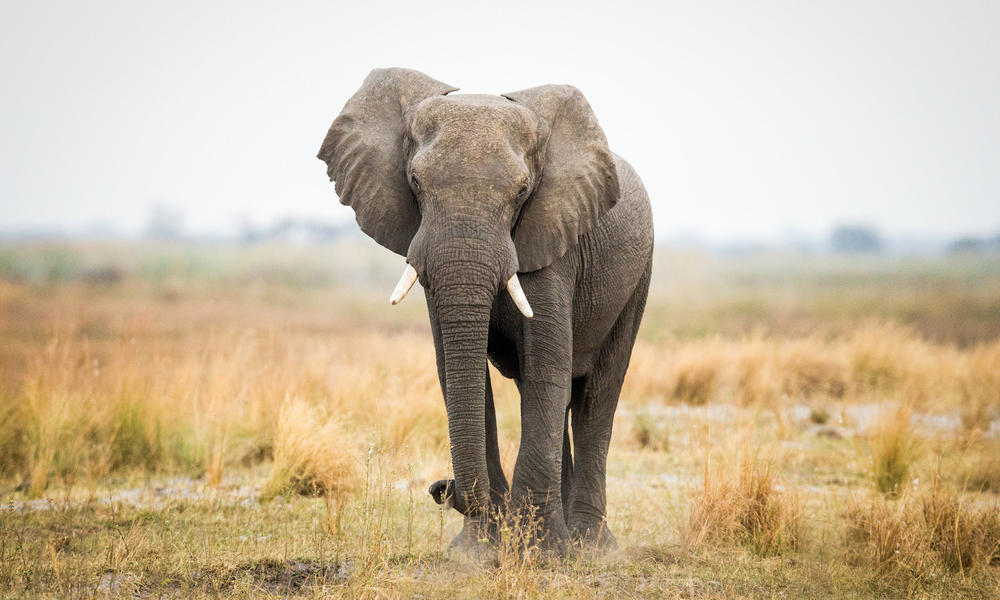

In [24]:
img

In [25]:
min_img_size = 224 
transform_pipeline = transforms.Compose([transforms.Resize((min_img_size,min_img_size)),
                                         transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                              std=[0.229, 0.224, 0.225])])
img = transform_pipeline(img)

In [27]:
img.shape

torch.Size([3, 224, 224])

In [28]:
img = img.unsqueeze(0)

In [29]:
img.shape

torch.Size([1, 3, 224, 224])

In [30]:
prediction = vgg16(img) 

In [31]:
prediction.argmax()

tensor(101)

In [32]:
import pandas as pd

In [33]:
labels=pd.read_csv("./data/vgg16_model_labels.csv",header=None)

In [34]:
labels[labels[0]==101]

,0,1
101,101,tusker


In [35]:
####### Transfer Learning basics #######
l=[i for i in vgg16.children()]

In [36]:
len(l)

3

In [37]:
from torch import nn

In [38]:
nn.Sequential(*list(l[0])[0:7])

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
)

In [39]:
class L1(nn.Module):
    def __init__(self):
        super().__init__()
        self.features=nn.Sequential(*list(l[0])[0:7])
    def forward(self,X):
        output=self.features(X)
        return output

In [40]:
mod=L1()

In [41]:
output=mod(img)

In [42]:
output.shape

torch.Size([1, 128, 112, 112])

In [43]:
output=output.detach().numpy()

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

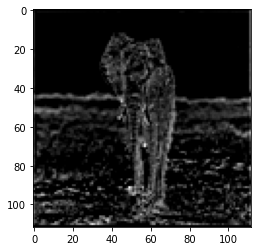

In [45]:
plt.imshow(output[0,2,:,:].reshape((112,112)),cmap='gray')

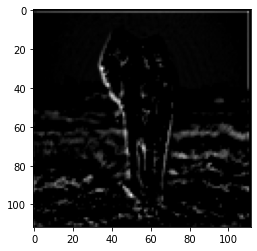

In [46]:
plt.imshow(output[0,13,:,:].reshape((112,112)),cmap='gray')

In [47]:
#### What is happening in the last layer?
class Ln(nn.Module):
    def __init__(self):
        super().__init__()
        self.features=nn.Sequential(*list(l[0])[0:-1])
    def forward(self,X):
        output=self.features(X)
        return output

In [48]:
mod=Ln()
output=mod(img)

In [49]:
output.shape

torch.Size([1, 512, 14, 14])

In [50]:
output=output.detach().numpy()

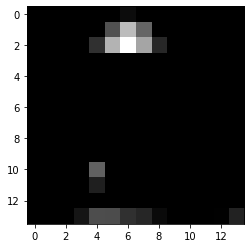

In [51]:
plt.imshow(output[0,0,:,:].reshape((14,14)),cmap='gray')

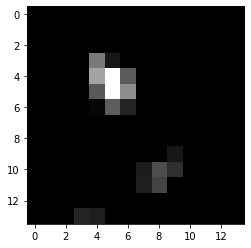

In [52]:
plt.imshow(output[0,2,:,:].reshape((14,14)),cmap='gray')

In [56]:
from torch.utils.data import DataLoader,Dataset
import torchvision
trans=transforms.Compose([transforms.Resize((150,150)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

Data [link](https://drive.google.com/file/d/1lg7qnga_3rLv8OjaQF1YJ0SxVh8KvlKt/view?usp=sharing)

In [57]:
path="/Users/gunnvantsaini/Documents/Data/Work/ML Course/Module 5 Neural Networks/Data/waffle_pancakes/train"

In [58]:
data=torchvision.datasets.ImageFolder(path,transform=trans)

In [59]:
data.classes

['pancakes', 'waffles']

In [60]:
dat=DataLoader(data,batch_size=1)

In [61]:
model_conv=models.vgg16(pretrained=True)

In [62]:
for param in model_conv.parameters():
    param.requires_grad=False

In [63]:
model_conv

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [64]:
model_conv.classifier=nn.Sequential(nn.Linear(512*7*7,120),
                                   nn.ReLU(),
                                   nn.Linear(120,2),
                                   nn.Softmax(dim=1))

In [65]:
model_conv

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [66]:
trans=transforms.Compose([transforms.Resize((150,150)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

In [67]:
data=torchvision.datasets.ImageFolder(path,transform=trans)

In [68]:
dat=DataLoader(data,batch_size=32)

In [69]:
import torch.optim as optim

In [70]:
criterion = nn.CrossEntropyLoss()

In [71]:
for p in model_conv.classifier.parameters():
    p.requires_grad=True

In [72]:
for p in model_conv.parameters():
    print(p.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True


In [73]:
optimizer_conv = optim.SGD(model_conv.classifier.parameters(), lr=0.001)

In [74]:
for epoch in range(1):
    print('Epoch {}/{}'.format(epoch, 10))
    print('-' * 10)
    for inputs, labels in dat:
        optimizer_conv.zero_grad()
        outputs = model_conv(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer_conv.step()
    print("Loss is {}".format(loss.item()))

Epoch 0/10
----------
Loss is 0.34432029724121094
